In [1]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
import math
from sklearn.utils.extmath import randomized_svd as fast_svd
from sklearn.decomposition import PCA
from hyperspy import signals
import time

C:\Users\Chenyu\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [12]:
# Run through all the different frame rates
path ='D:/2020/TensorSVD/ManuscriptRelated/SimulationData/DenoiseInput_cropped/STO/'
FPS_list = [1000,2000,4000,6000,8000,10000,20000,40000]
for i in range(len(FPS_list)):
    raw_data = sio.loadmat(path + 'Simulation_noisy_STO_slice_5_'+str(FPS_list[i])+'FPS_cropped_100layers.mat')
    raw_data = raw_data['datacube']
    truth_data = np.load(path + 'Simulation_truth_STO_slice_5_'+str(FPS_list[i])+'FPS_cropped_100layers.npy')
    start = time.time()
    raw_data_2D = np.reshape(raw_data,(114*114,100))
    im = signals.Signal2D(raw_data_2D.astype('float'))
    im = im.transpose(signal_axes = 1)
    im.decomposition()
    est_PCA = im.get_decomposition_model(6)
    est_PCA = np.asarray(est_PCA)
    est_PCA = np.reshape(est_PCA,(114,114,100))
    end = time.time()
    print(end-start)
    np.save('D:/2020/TensorSVD/ManuscriptRelated/SimulationData/DenoiseOutput_cropped/STO/\
Simulation_PCA_STO_slice_5_'+str(FPS_list[i])+'FPS_cropped_100layers.npy',est_PCA)
    print(averagePSNR(est_PCA,truth_data,0))

0.15391230583190918
25.61579625753496
0.1698753833770752
22.981194153205525
0.16487503051757812
20.171492714530494
0.18988847732543945
18.443285906300822
0.14989042282104492
17.063349402942016
0.16288304328918457
16.180174236185657
0.15590739250183105
13.065602007018775
0.18589138984680176
10.092877784396318


In [20]:
# Run through all the different frame rates
path ='D:/2020/TensorSVD/ManuscriptRelated/SimulationData/DenoiseInput_cropped/SiDislocation/'
FPS_list = [1000,2000,4000,6000,8000,10000,20000,40000]
for i in range(len(FPS_list)):
    raw_data = sio.loadmat(path + 'Simulation_noisy_SiDisl_slice_5_'+str(FPS_list[i])+'FPS_cropped_100layers.mat')
    raw_data = raw_data['datacube']
    truth_data = np.load(path + 'Simulation_truth_SiDisl_slice_5_'+str(FPS_list[i])+'FPS_cropped_100layers.npy')
    start = time.time()
    raw_data_2D = np.reshape(raw_data,(114*114,100))
    im = signals.Signal2D(raw_data_2D.astype('float'))
    im = im.transpose(signal_axes = 1)
    im.decomposition()
    est_PCA = im.get_decomposition_model(6)
    est_PCA = np.asarray(est_PCA)
    est_PCA = np.reshape(est_PCA,(114,114,100))
    end = time.time()
    print(end-start)
    np.save('D:/2020/TensorSVD/ManuscriptRelated/SimulationData/DenoiseOutput_cropped/SiDislocation/\
Simulation_PCA_SiDisl_slice_5_'+str(FPS_list[i])+'FPS_cropped_100layers.npy',est_PCA)
    print(averagePSNR(est_PCA,truth_data,0))

0.16390395164489746
27.673579234023205
0.16490554809570312
25.24227428445213
0.17287802696228027
22.604086025782557
0.15790963172912598
20.929955665068707
0.1778709888458252
19.73638543712234
0.14488840103149414
18.79585442398021
0.15990829467773438
15.769758508577086
0.16887354850769043
12.728589570066683


## Test matrix PCA on single case

In [16]:
path ='D:/2020/TensorSVD/ManuscriptRelated/SimulationData/DenoiseInput_cropped/STO/'
FPS = 1000
raw_data = sio.loadmat(path + 'Simulation_noisy_STO_slice_5_'+str(FPS)+'FPS_cropped_100layers.mat')
raw_data = raw_data['datacube']
truth_data = np.load(path + 'Simulation_truth_STO_slice_5_'+str(FPS)+'FPS_cropped_100layers.npy')
raw_data_2D = np.reshape(raw_data,(114*114,100))
im = signals.Signal2D(raw_data_2D.astype('float'))
im = im.transpose(signal_axes = 1)
im = im.T
im

<Signal1D, title: , dimensions: (100|12996)>

(114, 114, 100)

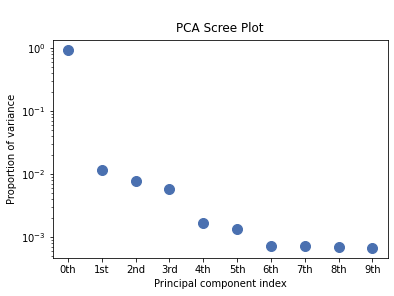

In [17]:
im.decomposition()
im.plot_explained_variance_ratio(n=10,linewidth=1)
est_PCA = im.get_decomposition_model(8)
est_PCA = np.asarray(est_PCA)
est_PCA = np.transpose(est_PCA)
est_PCA = np.reshape(est_PCA,(114,114,100))
est_PCA.shape

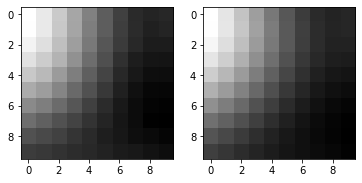

In [54]:
plt.subplot(121)
plt.imshow(est_PCA[10,10,:].reshape([10,10]))
plt.subplot(122)
plt.imshow(truth_data[10,10,:].reshape([10,10]))

27.414778808346988


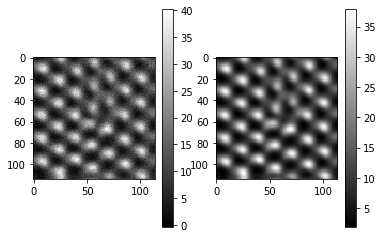

In [55]:
plt.subplot(121)
plt.imshow(est_PCA[:,:,10])
plt.colorbar()
plt.subplot(122)
plt.imshow(truth_data[:,:,10])
plt.colorbar()
print(averagePSNR(est_PCA,truth_data,0))

In [3]:
def psnr(truth, denoise):
    mse = np.mean( (truth - denoise) ** 2 )
    PIXEL_MAX = np.amax(truth)
    return 20 * math.log10(PIXEL_MAX / math.sqrt(mse))

In [4]:
# transpose_option = 1 for tensor denoised data, where first dimension is for rec space and need to be transposed to match simulation
# transpose_option = 0 for noisy data, third dimension is for rec space and no need to transpose
def averagePSNR(denoised_data,truth_data,transpose_option):
    nlayer = truth_data.shape[2]
    side = np.sqrt(nlayer)
    side = int(side)
    psnr_map = np.zeros((truth_data.shape[0],truth_data.shape[1]))
    for irow in range(truth_data.shape[0]):
        for icol in range(truth_data.shape[1]):
            truth = truth_data[irow,icol,:].reshape(side,side)
            if transpose_option == 1:
                denoise = np.transpose(denoised_data[:,irow,icol].reshape(side,side))
            else:
                denoise = denoised_data[irow,icol,:].reshape(side,side)
            psnr_map[irow,icol] = psnr(truth,denoise)
    return np.mean(psnr_map)